In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel('../Data/monthly_data_total.xlsx')

In [5]:
df.head()

,Date,Import,Export
0,2006-01-01,12519.71,9143.66
1,2006-02-01,11479.69,8993.29
2,2006-03-01,14314.02,11560.97
3,2006-04-01,12924.18,8624.66
4,2006-05-01,15105.67,10109.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    165 non-null    datetime64[ns]
 1   Import  165 non-null    float64       
 2   Export  165 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.9 KB


In [7]:
df.index = df.Date

In [8]:
df.head()

,Date,Import,Export
Date,,,
2006-01-01,2006-01-01,12519.71,9143.66
2006-02-01,2006-02-01,11479.69,8993.29
2006-03-01,2006-03-01,14314.02,11560.97
2006-04-01,2006-04-01,12924.18,8624.66
2006-05-01,2006-05-01,15105.67,10109.30


In [9]:
df = df[['Import', 'Export']]

In [10]:
df.head()

,Import,Export
Date,,
2006-01-01,12519.71,9143.66
2006-02-01,11479.69,8993.29
2006-03-01,14314.02,11560.97
2006-04-01,12924.18,8624.66
2006-05-01,15105.67,10109.30


In [11]:
df.shape

(165, 2)

In [12]:
df = df.resample('M').sum()

In [13]:
df.shape

(165, 2)

Text(0, 0.5, 'Values in million US $')

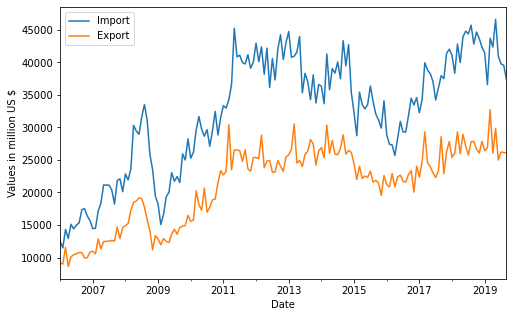

In [14]:
df.plot(figsize = (8,5))
plt.ylabel('Values in million US $')

In [15]:
window  = 12
df['MA_Import']= df['Import'].rolling(window).mean()
df['MA_Export']= df['Export'].rolling(window).mean()

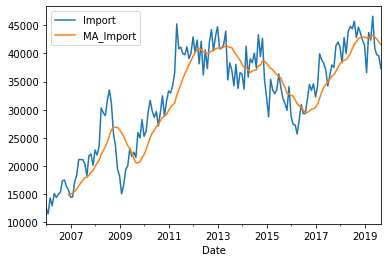

In [16]:
df[['Import', 'MA_Import']].plot()

In [17]:
df['Detrend_Import'] = df['Import']-df['MA_Import']
df['Detrend_Export'] = df['Export']-df['MA_Export']

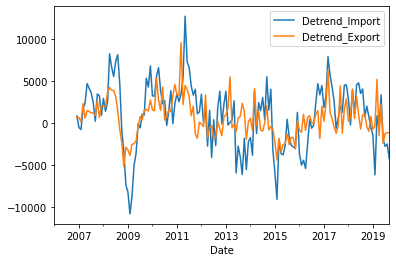

In [18]:
df[['Detrend_Import', 'Detrend_Export']].plot()

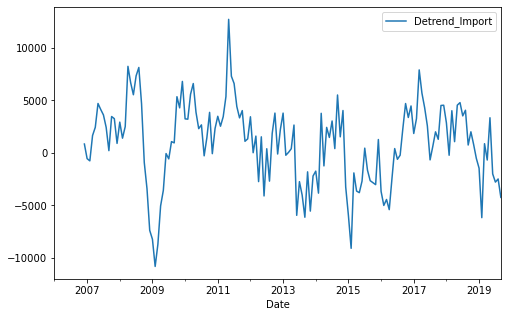

In [19]:
df[['Detrend_Import']].plot(figsize = (8,5))

In [20]:
df.dropna(inplace  = True)

In [21]:
df['Detrend_Import'][0::window]

Date
2006-12-31     847.789167
2007-12-31     909.143333
2008-12-31   -7390.493333
2009-12-31    6817.912500
2010-12-31    2325.010000
2011-12-31    1338.899167
2012-12-31    2242.745833
2013-12-31   -2203.388333
2014-12-31   -3242.268333
2015-12-31    1277.206667
2016-12-31    4477.756667
2017-12-31    4547.829167
2018-12-31    -528.607500
Freq: 12M, Name: Detrend_Import, dtype: float64

In [22]:
np.nanmean(df['Detrend_Import'][0::window])

878.4257692307808

In [23]:
# from pandas.core.nanops import nanmean as pd_nanmean
period_averages = [np.nanmean(df['Detrend_Import'][i::window], axis=0) for i in range(window)]

In [24]:
period_averages

[878.4257692307808,
 2.2652564102684734,
 -1976.0645512820395,
 1262.5142307692429,
 854.6404487179602,
 2852.7247435897566,
 1060.2791666666783,
 1563.569166666678,
 758.9837179487308,
 778.807948717962,
 2043.9509027777895,
 771.3836111111256]

In [25]:
period_norm_averages = period_averages / np.mean(period_averages, axis=0)

In [26]:
period_norm_averages

array([ 9.71398264e-01,  2.50501092e-03, -2.18521102e+00,  1.39613861e+00,
        9.45095507e-01,  3.15465684e+00,  1.17249901e+00,  1.72905717e+00,
        8.39314478e-01,  8.61236903e-01,  2.26028246e+00,  8.53026774e-01])

In [27]:
nobs = len(df)
seasonal = np.tile(period_norm_averages.T, nobs // window + 1).T[:nobs]

In [28]:
seasonal

array([ 9.71398264e-01,  2.50501092e-03, -2.18521102e+00,  1.39613861e+00,
        9.45095507e-01,  3.15465684e+00,  1.17249901e+00,  1.72905717e+00,
        8.39314478e-01,  8.61236903e-01,  2.26028246e+00,  8.53026774e-01,
        9.71398264e-01,  2.50501092e-03, -2.18521102e+00,  1.39613861e+00,
        9.45095507e-01,  3.15465684e+00,  1.17249901e+00,  1.72905717e+00,
        8.39314478e-01,  8.61236903e-01,  2.26028246e+00,  8.53026774e-01,
        9.71398264e-01,  2.50501092e-03, -2.18521102e+00,  1.39613861e+00,
        9.45095507e-01,  3.15465684e+00,  1.17249901e+00,  1.72905717e+00,
        8.39314478e-01,  8.61236903e-01,  2.26028246e+00,  8.53026774e-01,
        9.71398264e-01,  2.50501092e-03, -2.18521102e+00,  1.39613861e+00,
        9.45095507e-01,  3.15465684e+00,  1.17249901e+00,  1.72905717e+00,
        8.39314478e-01,  8.61236903e-01,  2.26028246e+00,  8.53026774e-01,
        9.71398264e-01,  2.50501092e-03, -2.18521102e+00,  1.39613861e+00,
        9.45095507e-01,  

In [29]:
len(seasonal)

154

In [30]:
df['Seasonal_Import'] = seasonal

In [31]:
period_averages = [np.nanmean(df['Detrend_Export'][i::window], axis=0) for i in range(window)]
period_norm_averages = period_averages / np.mean(period_averages, axis=0)
nobs = len(df)
seasonal = np.tile(period_norm_averages.T, nobs // window + 1).T[:nobs]
df['Seasonal_Export'] = seasonal

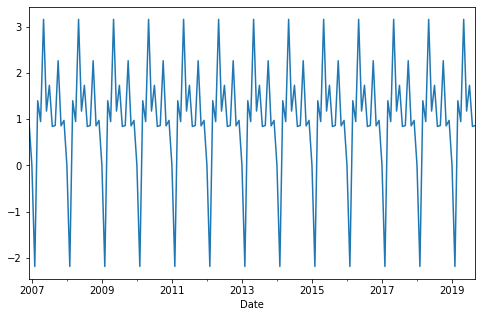

In [32]:
df['Seasonal_Import'].plot(figsize = (8,5))

In [33]:
df['Randomness_Import'] = df['Detrend_Import'] - df['Seasonal_Import']
df['Randomness_Export'] = df['Detrend_Export'] - df['Seasonal_Export']

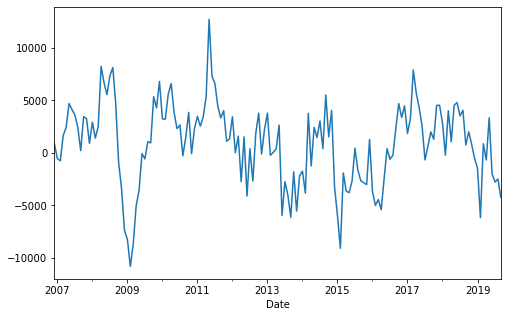

In [34]:
df['Randomness_Import'].plot(figsize = (8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1188A8B0>,
      dtype=object)

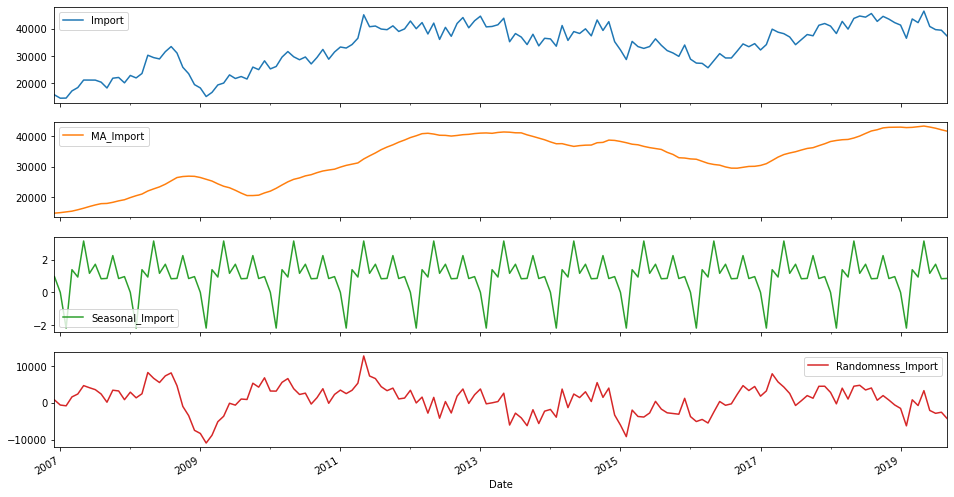

In [35]:
df[['Import', 'MA_Import', 'Seasonal_Import', 'Randomness_Import']].plot(subplots = True, figsize = (16,9))

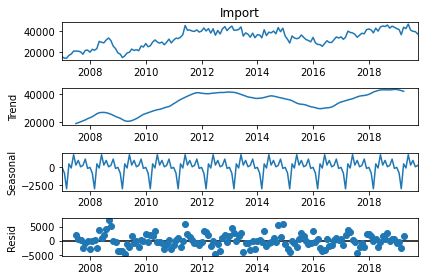

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Import'], model='additive')
result.plot()
plt.show()

## This confirms that our splitting is perfect

array([<matplotlib.axes._subplots.AxesSubplot object at 0x133F22B0>,
      dtype=object)

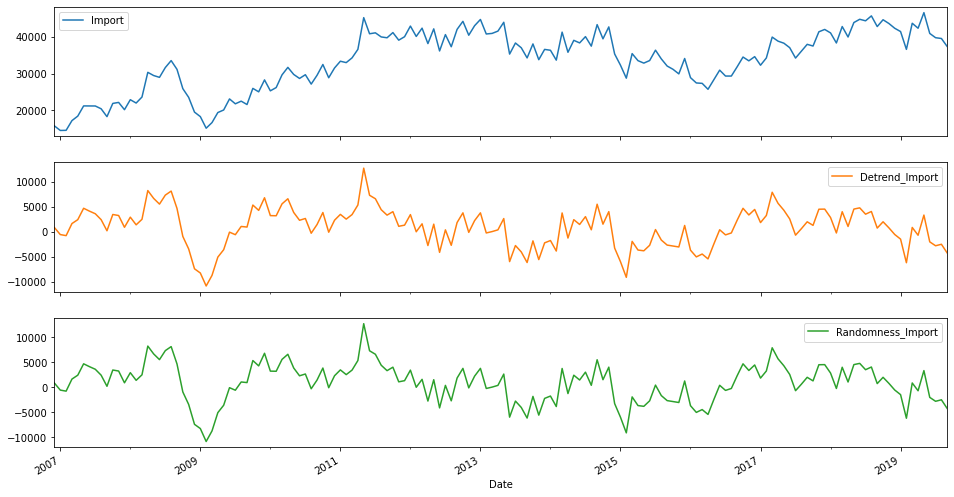

In [37]:
df[['Import', 'Detrend_Import', 'Randomness_Import']].plot(subplots = True, figsize = (16,9))

In [38]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [39]:
adf_test(df['Randomness_Import'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.900223
p-value                          0.002033
#Lags Used                       2.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


In [40]:
adf_test(df['Randomness_Export'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.926849
p-value                          0.042314
#Lags Used                      12.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64


## Import Forecast

In [41]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df['Randomness_Import'], nlags=12)
lag_pacf = pacf(df['Randomness_Import'], nlags=12, method='ols')

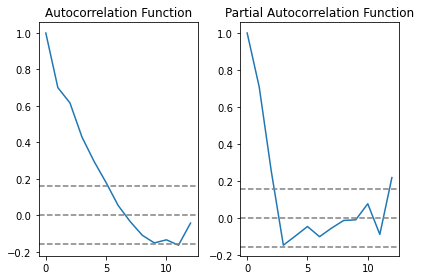

In [42]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [43]:
# ARMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# fit model
model = ARIMA(df['Randomness_Import'][:-12], order=(1, 0, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df[:-12]), len(df[:-12]) + 11)



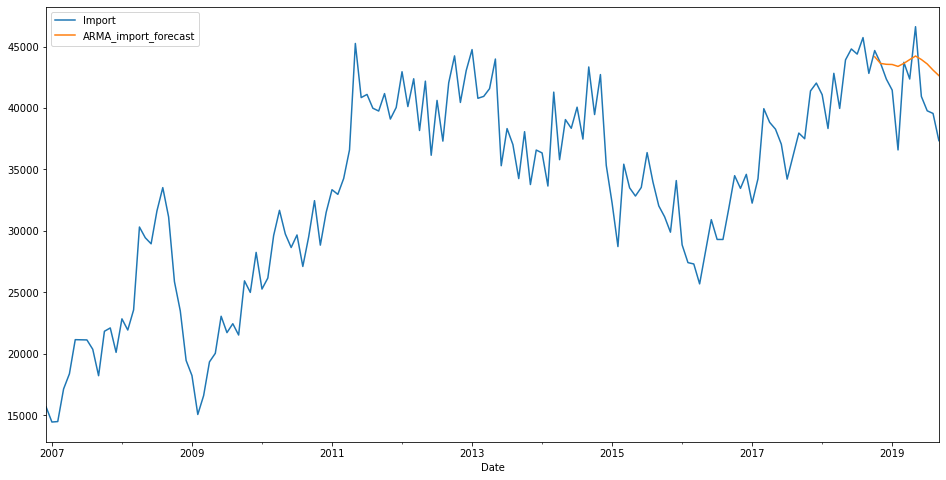

In [44]:
df['ARMA_import_forecast'] = yhat
df['ARMA_import_forecast'] = df['ARMA_import_forecast'] + df['Seasonal_Import'] + df['MA_Import']
df[['Import','ARMA_import_forecast']].plot(figsize = (16,8))

## Export Forecast

In [45]:
lag_acf = acf(df['Randomness_Export'], nlags=12)
lag_pacf = pacf(df['Randomness_Export'], nlags=12, method='ols')

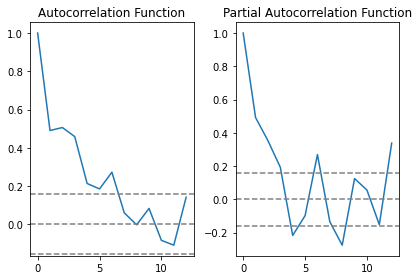

In [46]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [47]:
# ARMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# fit model
model = ARIMA(df['Randomness_Export'][:-12], order=(1, 0, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df[:-12]), len(df[:-12]) + 11)



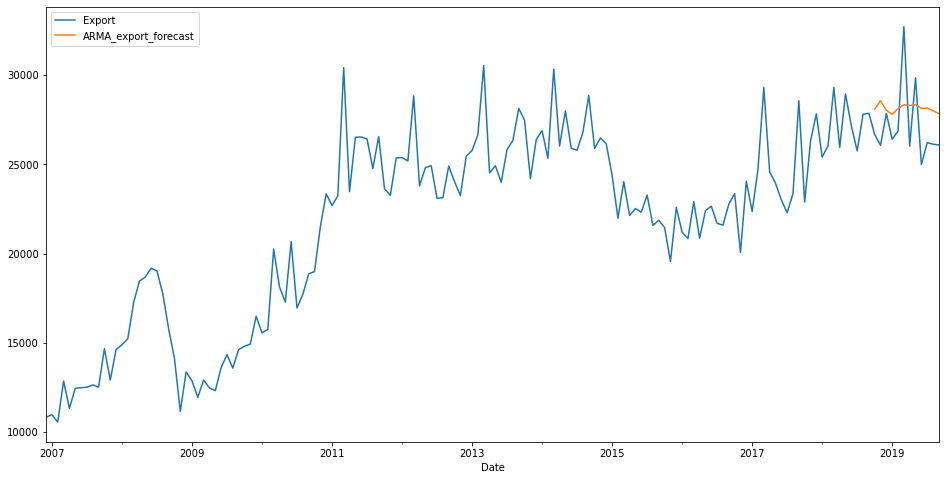

In [48]:
df['ARMA_export_forecast'] = yhat
df['ARMA_export_forecast'] = df['ARMA_export_forecast'] + df['Seasonal_Export'] + df['MA_Export']
df[['Export','ARMA_export_forecast']].plot(figsize = (16,8))

## Error

In [49]:
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

In [53]:
rmse(df['Import'][-12:], df['ARMA_import_forecast']).round(2), rmse(df['Export'][-12:], df['ARMA_export_forecast']).round(2)

(3221.36, 2210.54)

In [51]:
%matplotlib notebook

<IPython.core.display.Javascript object>


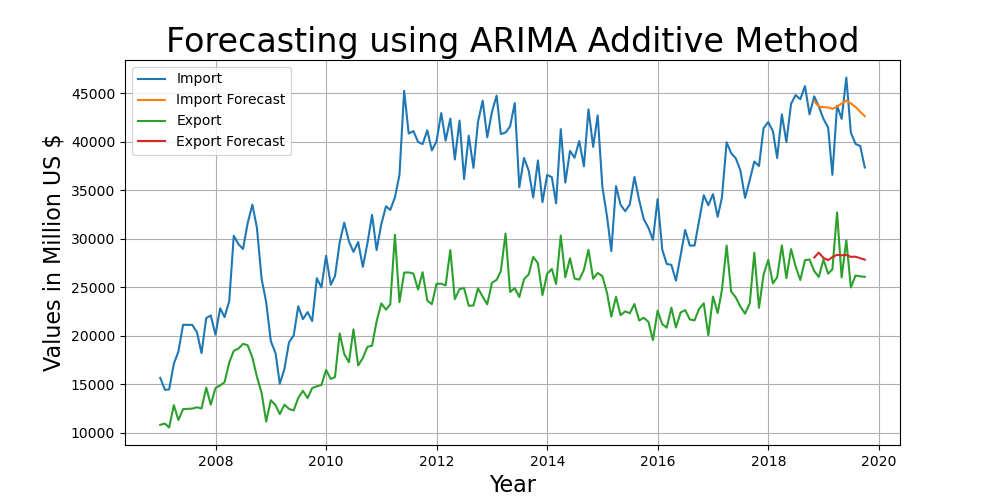

In [52]:
plt.figure(figsize=(10,5))
plt.plot( df['Import'], label='Import')
plt.plot( df['ARMA_import_forecast'], label='Import Forecast')
plt.plot( df['Export'], label='Export')
plt.plot( df['ARMA_export_forecast'], label='Export Forecast')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Values in Million US $', fontsize = 16)
plt.title('Forecasting using ARIMA Additive Method', fontsize = 24)
plt.grid()
plt.legend()
plt.show()